# Réaliser une carte à ronds avec Python avec la fonction `f_ronds_prop`

In [5]:
import os
import sys
os.chdir('/home/jovyan/lissage_python')
chem_pgms = os.getcwd()  + "/pgms"
sys.path.append(chem_pgms)
chem_fonds = os.getcwd() + "/fonds"
sys.path.append(chem_fonds)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from f_ronds_prop import *

## Test de la fonction à partir d'un seul fond (variable contenue dans le fond)

### Population des pays du monde

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world_ronds, world_legende = f_ronds_prop(world, 'pop_est', x_legend = -150, y_legend = -60, quantile_legend=0.75)

In [3]:
type(world_ronds)

geopandas.geodataframe.GeoDataFrame

In [4]:
type(world_legende)

geopandas.geodataframe.GeoDataFrame

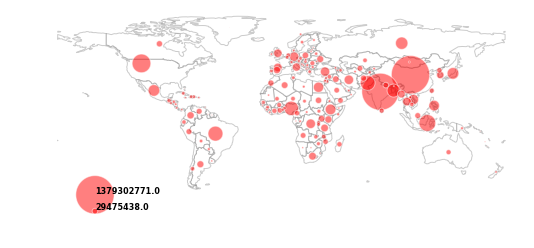

In [5]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 4))
# Plot layer of polygons on the axis
world.plot(ax=ax, facecolor = 'white', edgecolor = 'grey', alpha = 0.4)
world_ronds.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
world_legende.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
for i in range(2):
    plt.text(world_legende.x[i], world_legende.y[i], world_legende.label[i],fontsize=8,fontweight='bold',ha='left',va='bottom',color='k')
# Remove axis frames
ax.set_axis_off()
# DisplayS
plt.show()

## Test de la fonction à partir d'un fond et d'un jeu de données

### Population des pays du monde

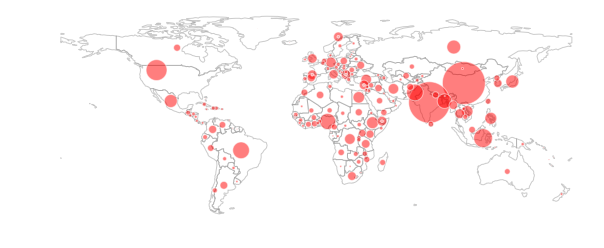

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world_df = pd.DataFrame(world)
world = world.iloc[:,1:]

world_ronds, world_legende = f_ronds_prop(world, 'pop_est', data = world_df, key_fond = 'iso_a3', x_legend = -150, y_legend = -60)

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 4))
# Plot layer of polygons on the axis
world.plot(ax=ax, facecolor = 'white', edgecolor = 'grey', alpha = 0.4)
world_ronds.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

## Test de la fonction à partir d'un fond et d'un jeu de données avec clé différente

### Population des pays du monde

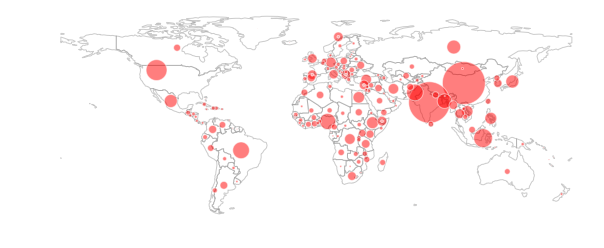

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world_df = pd.DataFrame(world)
world_df['cle'] = world_df['iso_a3']
world = world.iloc[:,1:]

world_ronds, world_legende = f_ronds_prop(world, 'pop_est', data = world_df, key_fond = 'iso_a3', key_data = 'cle', x_legend = -150, y_legend = -60)

# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 4))
# Plot layer of polygons on the axis
world.plot(ax=ax, facecolor = 'white', edgecolor = 'grey', alpha = 0.4)
world_ronds.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

### Population régionale 2015 en France métropolitaine

In [8]:
chem_reg = chem_fonds + "/reg_metro_pop2015.shp"
reg_pop = gpd.read_file(chem_reg)

In [9]:
reg_pop.total_bounds

array([  99225.96690073, 6049646.94426436, 1242375.02831184,
       7110480.03135473])

In [10]:
reg_pop.head()

REG                  libelle   surf     P15_POP     P10_POP  \
0  11            Île-de-France  12063  12082144.0  11786234.0   
1  24      Centre-Val de Loire  39471   2578592.0   2548065.0   
2  27  Bourgogne-Franche-Comté  47977   2820940.0         NaN   
3  28                Normandie  30122   3339131.0         NaN   
4  32          Hauts-de-France  32000   6009976.0         NaN   

                                            geometry  
0  POLYGON ((726401.9987505731 6808742.995371704,...  
1  POLYGON ((556180.948925472 6604187.978059209, ...  
2  POLYGON ((917645.9600628532 6577432.999753041,...  
3  (POLYGON ((367792.0148009461 6846696.947987073...  
4  POLYGON ((761575.0130065992 6918671.032896563,...

In [11]:
ronds, legende = f_ronds_prop(reg_pop, 'P15_POP', x_legend = 100000, y_legend = 6500000, quantile_legend=0.1)

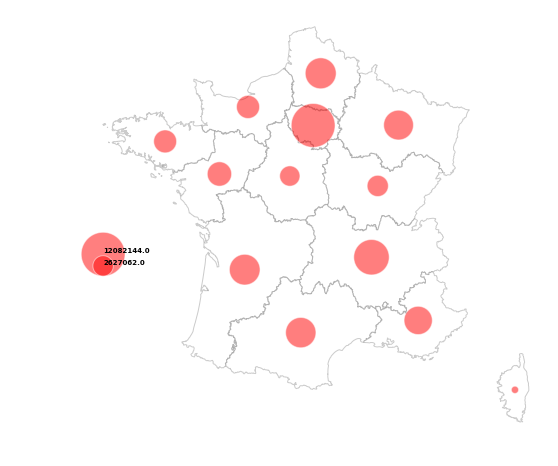

In [13]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 8))
# Plot layer of polygons on the axis
reg_pop.plot(ax=ax, facecolor = 'white', edgecolor = 'grey', alpha = 0.4)
ronds.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
legende.plot(ax=ax, facecolor='red', edgecolor = 'white', alpha = 0.5)
for i in range(2):
    plt.text(legende.x[i], legende.y[i], legende.label[i],fontsize=7,fontweight='bold',ha='left',va='bottom',color='k')
# Remove axis frames
ax.set_axis_off()
# DisplayS
plt.show()

### Export des fonds

#### Export en shapefile

In [15]:
ronds.to_file("exports/shp/ronds_metro_reg_pop2015.shp")
legende.to_file("exports/shp/ronds_metro_reg_pop2015_legende.shp")

#### Export en geopackage

In [16]:
ronds.to_file("exports/geopackage/ronds_metro_reg_pop2015.gpkg", layer='ronds', driver="GPKG")
legende.to_file("exports/geopackage/ronds_metro_reg_pop2015.gpkg", layer='legende', driver="GPKG")